# Embedded feature engineering method with using Lasso

In this program, we reduced the number of features by using Lasso. 

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV

from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import csv
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('data.csv', delimiter=',') 
y = np.loadtxt('labels.csv', delimiter=',')
with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]

In [6]:
X

array([[0.11184, 0.12387, 0.12858, ..., 0.60436, 0.56294, 1.0144 ],
       [0.29834, 0.26881, 0.26239, ..., 0.58386, 0.46658, 0.74867],
       [0.36912, 0.39587, 0.38999, ..., 0.49383, 0.62363, 0.61417],
       ...,
       [0.15921, 0.15782, 0.16968, ..., 0.63907, 0.62307, 1.0707 ],
       [0.94111, 0.95293, 0.9505 , ..., 0.99212, 0.97502, 0.97734],
       [0.25397, 0.2434 , 0.26774, ..., 0.83146, 0.76753, 0.81081]])

In [10]:
#In this block of code we use L1 regularisation (Lasso) to remove the number of features. We applied this in a for loop
#to achieve leave one out cross validation (LOOCV)

#Apply for loop to achieve LOOCV:
for i in range(0,X.shape[0],10):  
        x_test_forcv = X[i:i+10]
        y_test_forcv = y[i:i+10]
        x_train_forcv = np.concatenate((X[:i],X[i+10:]),axis=0)
        y_train_forcv = np.concatenate((y[:i],y[i+10:]),axis=0)
        print(i,x_test_forcv.shape,y_test_forcv.shape,x_train_forcv.shape,y_train_forcv.shape)
        X_train = pd.DataFrame(x_train_forcv)
        X_test = pd.DataFrame(x_test_forcv)
        y_test = pd.DataFrame(y_test_forcv)
        y_train = pd.DataFrame(y_train_forcv)
        print('at loop', i)

        #Reduced number of features with L1 regression
        sel = SelectFromModel(LogisticRegression(penalty = 'l1', C = 1,
                                         solver = 'liblinear')) # c is inverse of strength of regularisation

        #Reduced the features
        sel.fit(X_train,y_train.values.ravel())
        a = sel.get_support()
        #print(a)
        b = sel.estimator_.coef_ # beauty of regularisation , makes unnecessary features 0
        #print(b)
        #Obtain training and test data with reduced features
        X_train_l1 = sel.transform(X_train)
        X_test_l1 = sel.transform(X_test)
        
        #With reduced features, we test the feature with a SVM model. 
        param_grid = {'C':[0.1,1,100,1000],'kernel':['linear','rbf','poly','sigmoid'],
              'degree':[1,2,3,4,5,6]}
        grid_svc = GridSearchCV(SVC(),param_grid)
        grid_svc.fit(X_train_l1,y_train.values.ravel())
        y_pred = grid_svc.predict(X_test_l1)
        accuracy = accuracy_score(y_test, y_pred)
        float_accuracy = f'{accuracy:.3f}'
        print(float_accuracy)
        


0 (10, 432) (10,) (170, 432) (170,)
at loop 0
0.700
10 (10, 432) (10,) (170, 432) (170,)
at loop 10
0.800
20 (10, 432) (10,) (170, 432) (170,)
at loop 20
0.900
30 (10, 432) (10,) (170, 432) (170,)
at loop 30
0.700
40 (10, 432) (10,) (170, 432) (170,)
at loop 40
0.900
50 (10, 432) (10,) (170, 432) (170,)
at loop 50
0.800
60 (10, 432) (10,) (170, 432) (170,)
at loop 60
0.800
70 (10, 432) (10,) (170, 432) (170,)
at loop 70
0.800
80 (10, 432) (10,) (170, 432) (170,)
at loop 80
1.000
90 (10, 432) (10,) (170, 432) (170,)
at loop 90
0.900
100 (10, 432) (10,) (170, 432) (170,)
at loop 100
0.900
110 (10, 432) (10,) (170, 432) (170,)
at loop 110
0.600
120 (10, 432) (10,) (170, 432) (170,)
at loop 120
0.900
130 (10, 432) (10,) (170, 432) (170,)
at loop 130
1.000
140 (10, 432) (10,) (170, 432) (170,)
at loop 140
0.900
150 (10, 432) (10,) (170, 432) (170,)
at loop 150
0.400
160 (10, 432) (10,) (170, 432) (170,)
at loop 160
0.600
170 (10, 432) (10,) (170, 432) (170,)
at loop 170
0.700


# L1 Lasso embedded feature engineering. (SVM model test)

The code below finds the reduced number of features with a logistic model and L1 lasso. The reduced number of features are used for a SVM model and the performance metric: average accuracy, standard deviation of accuracy, sensivitivty and specificity are calculated.

0 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


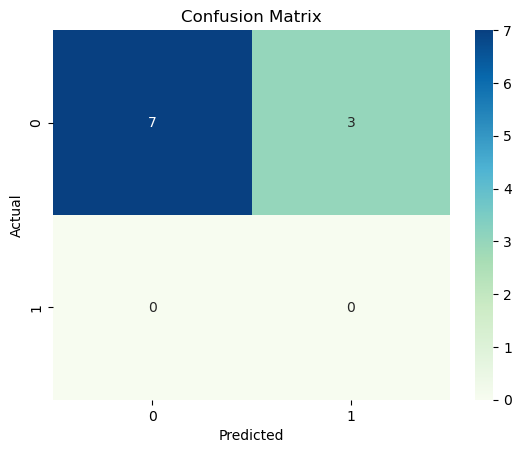

no. of iteration 10 Duration: 0:00:01.115173
10 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


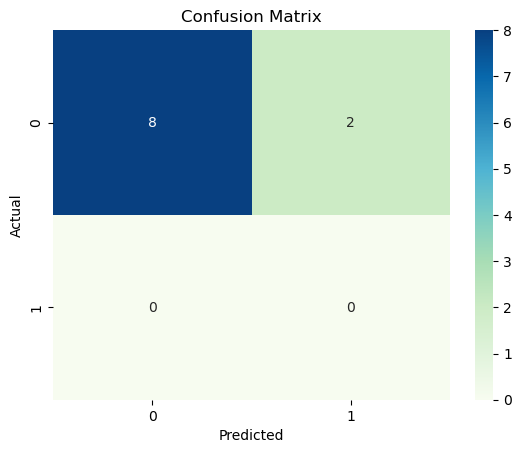

no. of iteration 20 Duration: 0:00:01.186674
20 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


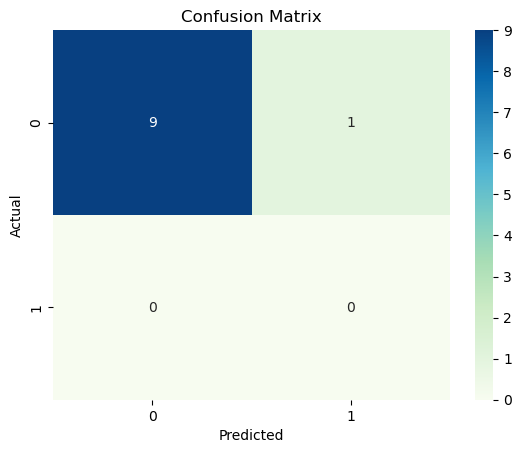

no. of iteration 30 Duration: 0:00:01.244665
30 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


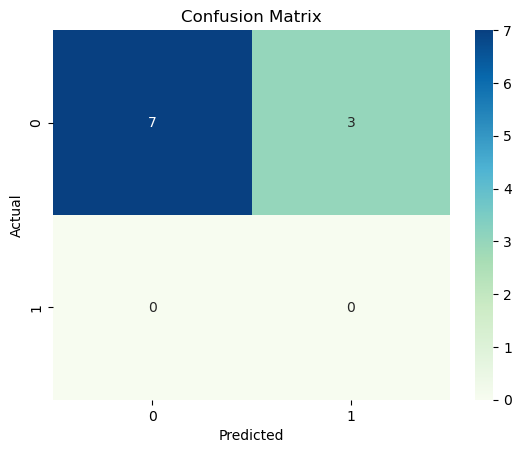

no. of iteration 40 Duration: 0:00:01.245785
40 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


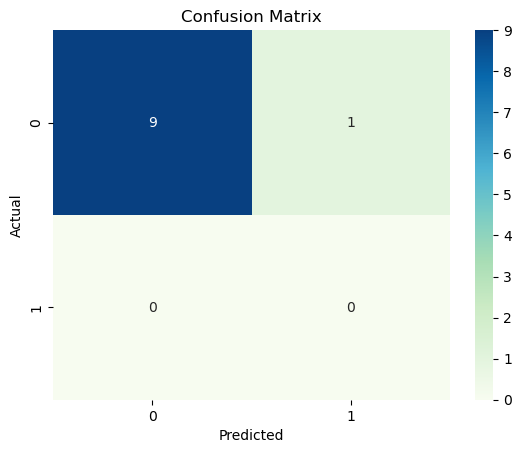

no. of iteration 50 Duration: 0:00:01.233831
50 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


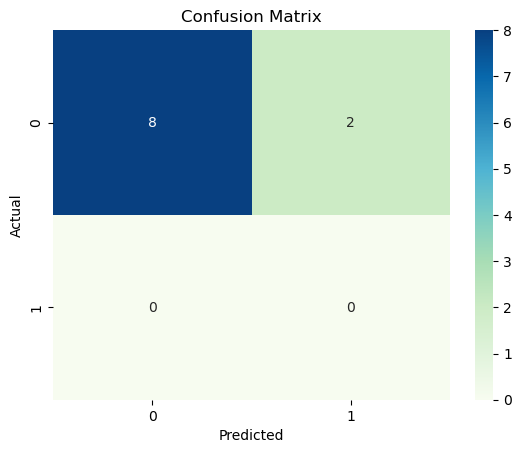

no. of iteration 60 Duration: 0:00:01.272076
60 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


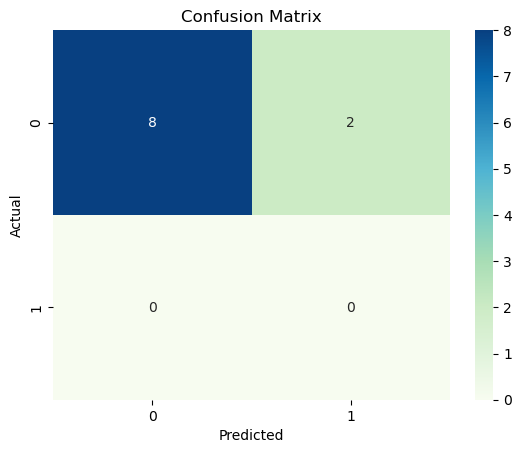

no. of iteration 70 Duration: 0:00:01.243274
70 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


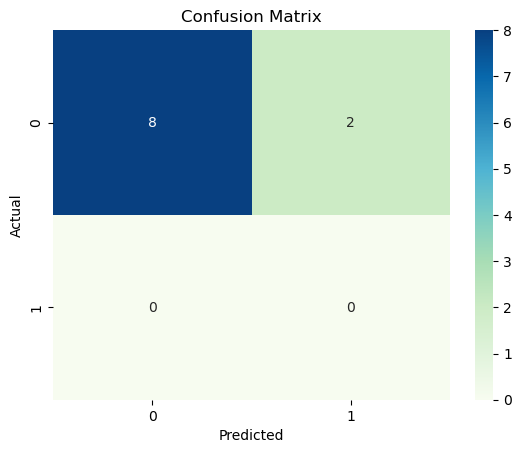

no. of iteration 80 Duration: 0:00:02.556143
80 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


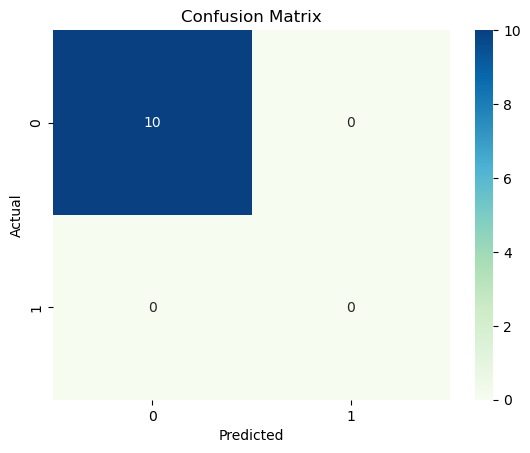

no. of iteration 90 Duration: 0:00:01.244276
90 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])


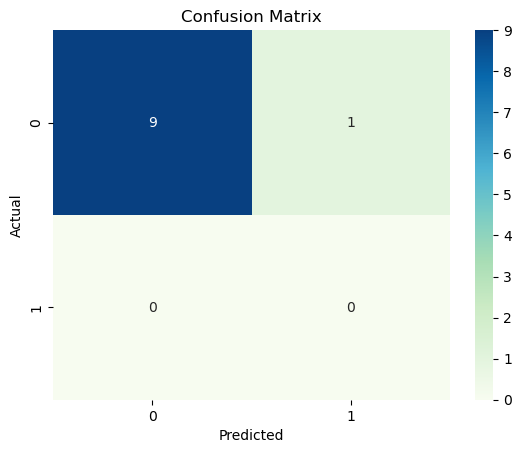

no. of iteration 100 Duration: 0:00:01.235963
100 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


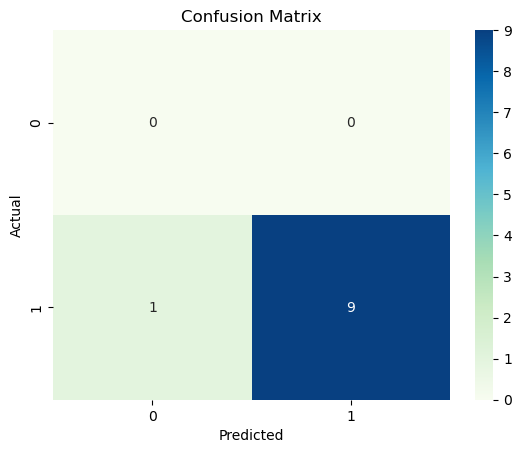

no. of iteration 110 Duration: 0:00:01.196254
110 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


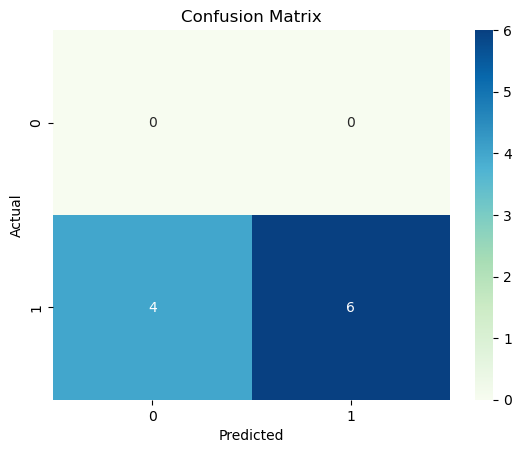

no. of iteration 120 Duration: 0:00:01.132777
120 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


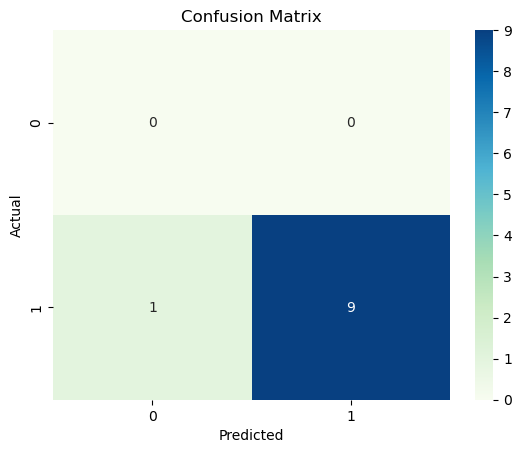

no. of iteration 130 Duration: 0:00:02.356056
130 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[ 0  0]
 [ 0 10]]
sensitivity: 1.0
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


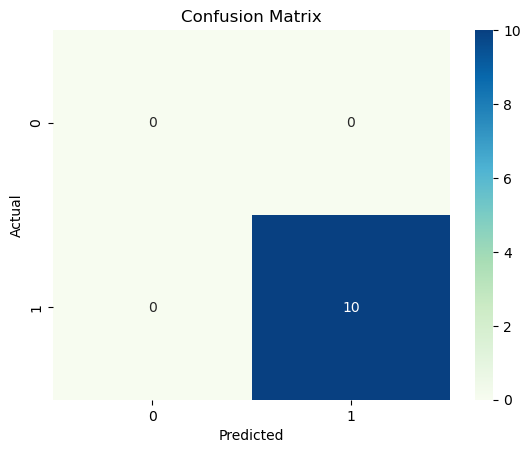

no. of iteration 140 Duration: 0:00:01.317432
140 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


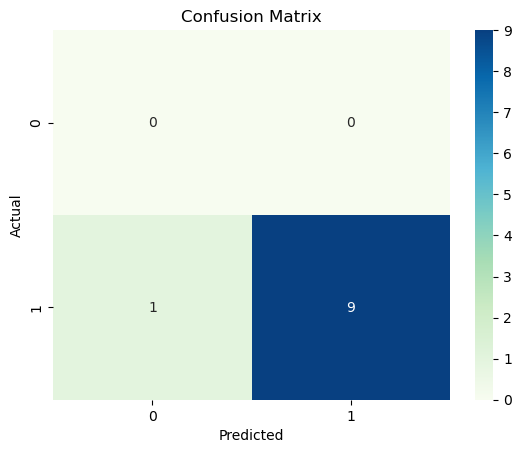

no. of iteration 150 Duration: 0:00:01.233201
150 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [6 4]]
sensitivity: 0.4
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


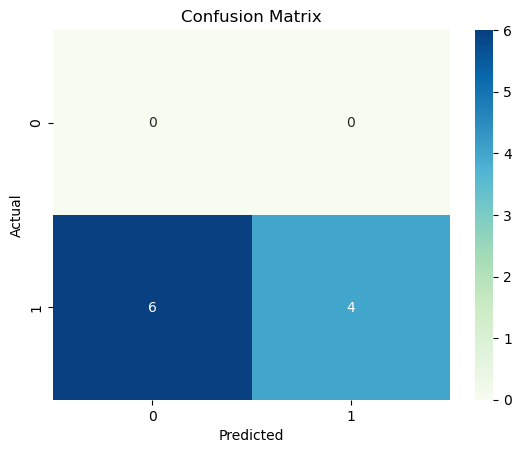

no. of iteration 160 Duration: 0:00:01.179621
160 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


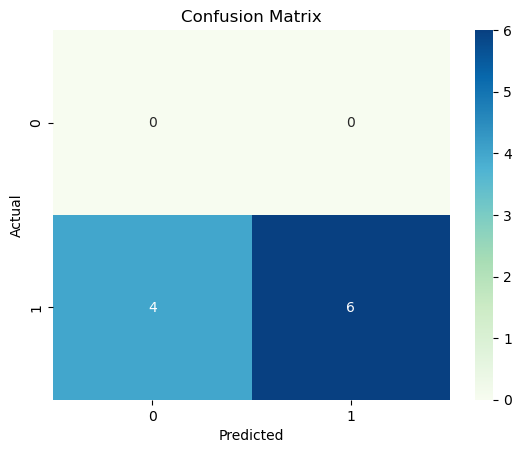

no. of iteration 170 Duration: 0:00:01.134126
170 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


C:\Users\Michael\AppData\Local\Temp\ipykernel_22440\764832542.py:35: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])


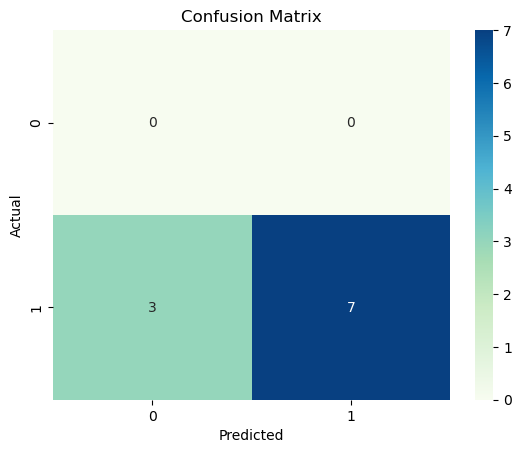

no. of iteration 180 Duration: 0:00:01.092626
mean wrt loocv: [0.7, 0.8, 0.9, 0.7, 0.9, 0.8, 0.8, 0.8, 1.0, 0.9, 0.9, 0.6, 0.9, 1.0, 0.9, 0.4, 0.6, 0.7]
Average svm score for the model for considering 0.7944444444444444


In [12]:

#Performance metric to be saved
accuracy_scores_for_indpat = 0
score = []
SVM_accuracy_score = [] 
SVM_sensitivity = []
SVM_specificity = []

#This function recieves test dna training data. Feature engineering is applied with lasso and performance metrics are 
#saved as global variables
def run_svm(X_tr,X_te,y_tr,y_te):
        #Global variables
        global accuracy_scores_for_indpat,score,start_time, SVM_accuracy_score, SVM_sensitivity, SVM_specificity
        start_time = datetime.now()
        #Feature selection: reduce feature with L1 lasso
        sel = SelectFromModel(LogisticRegression(penalty = 'l1', C = 1,
                                         solver = 'liblinear')) # c is inverse of strength of regularisation

        #Fit this to model
        sel.fit(X_train,y_train.values.ravel())
        a = sel.get_support()
        #print(a)
        b = sel.estimator_.coef_ # beauty of regularisation , makes unnecessary features 0
        #Training and test data reduced with number of features
        X_train_l1 = sel.transform(X_train)
        X_test_l1 = sel.transform(X_test)
        
        #Test reduced features with SVM model. Test will the hyper parameters below
        param ={'C':[0.1,1,100,1000],'kernel':['linear','rbf','poly','sigmoid'],
              'degree':[1,2,3,4,5,6]}
        grid_svc= GridSearchCV(SVC(),param)
        grid_svc.fit(X_train_l1,y_train.values.ravel())
        y_pred = grid_svc.predict(X_test_l1)
        accuracyscore = accuracy_score(y_test, y_pred)
        
        #Calculate confusion matrix, accuracy, sensensitivity and specificity. 
        score.append(accuracyscore)
        accuracy_scores_for_indpat = accuracy_scores_for_indpat + (accuracy_score(y_te,y_pred))
        conf_matrix=confusion_matrix(y_te,y_pred,labels=[0,1])
        sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
        specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
        
        #Plot confusion matrix
        print("Confusion Matrix:")
        print(conf_matrix)
        print("sensitivity:", sensitivity)
        print("Specificity:", specificity)
        sns.heatmap(conf_matrix,cmap="GnBu",annot=True,
        #cbar_kws={"orientation":"vertical","label":"color bar"},
        xticklabels=[0,1],yticklabels=[0,1])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

        #Save scores in array
        SVM_accuracy_score.append(accuracy_score(y_te,y_pred))
        SVM_sensitivity.append(sensitivity)
        SVM_specificity.append(specificity)

accuracy_score_list = []

#For loop is used to allow for cross validation (leave one out cross validation)
for i in range(0,X.shape[0],10):
        #Loop finds the new test and training data to pass through model for CV. 
        x_test_forcv = X[i:i+10]
        y_test_forcv = y[i:i+10]
        x_train_forcv = np.concatenate((X[:i],X[i+10:]),axis=0)
        y_train_forcv = np.concatenate((y[:i],y[i+10:]),axis=0)
        #Converting numpy to pandasdataframes
        X_train = pd.DataFrame(x_train_forcv)
        X_test = pd.DataFrame(x_test_forcv)
        y_test = pd.DataFrame(y_test_forcv)
        y_train = pd.DataFrame(y_train_forcv)
        #Pass training data and test data to model and for feature engineering
        run_svm(X_train,X_test,y_train,y_test)

        X_train.columns[sel.get_support()]# extracting selected feature columns
        end_time = datetime.now()
        print('no. of iteration',i+10,'Duration: {}'.format(end_time - start_time))

print('mean wrt loocv:',score)
print('Average svm score for the model for considering',accuracy_scores_for_indpat/18)


#plot for last case only
#mi_score.plot.bar(figsize = (16,7))




In [14]:
#The code below prints the average accuracy, standard deviation of the accuracy, mean sensivity and mean specificity: 
#This is for the SVM:
print("Accuracy score Mean:")
print(np.mean(SVM_accuracy_score))
print("\n Accuracy score Sd:")
print(np.std(SVM_accuracy_score))
print("\n Sensivitity score mean:")
print(np.nanmean(SVM_sensitivity))
print("\n Specificity score mean:")
print(np.nanmean(SVM_specificity))

Accuracy score Mean:
0.7944444444444444

 Accuracy score Sd:
0.15082079956109143

 Sensivitity score mean:
0.75

 Specificity score mean:
0.8300000000000001


# L1 Lasso embedded feature engineering. (logisitc regression model test)

This code is copied and pasted and modified for the logisitic regression (LR) model.

The code below finds the reduced number of features with a logistic regression model and L1 lasso. The reduced number of features are used for a LR model and the performance metric: average accuracy, standard deviation of accuracy, sensivitivty and specificity are calculated.

0 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


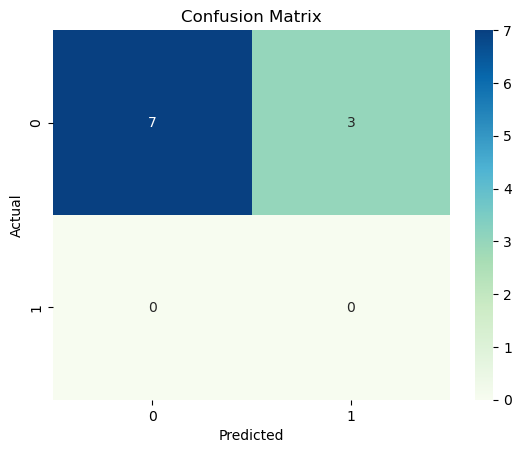

no. of iteration 10 Duration: 0:00:12.724878
10 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


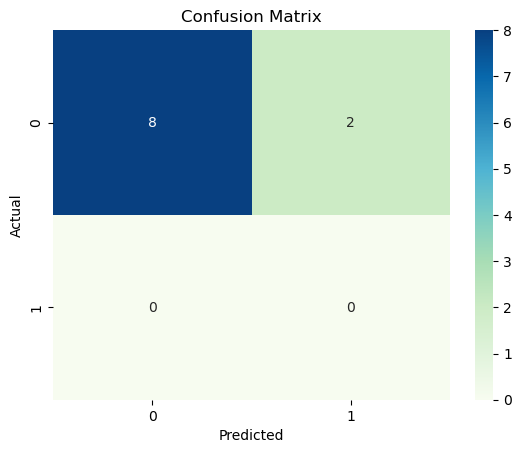

no. of iteration 20 Duration: 0:00:15.026021
20 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


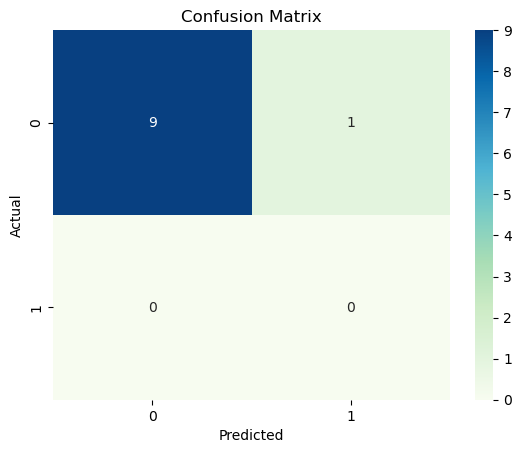

no. of iteration 30 Duration: 0:00:13.597534
30 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[7 3]
 [0 0]]
sensitivity: nan
Specificity: 0.7


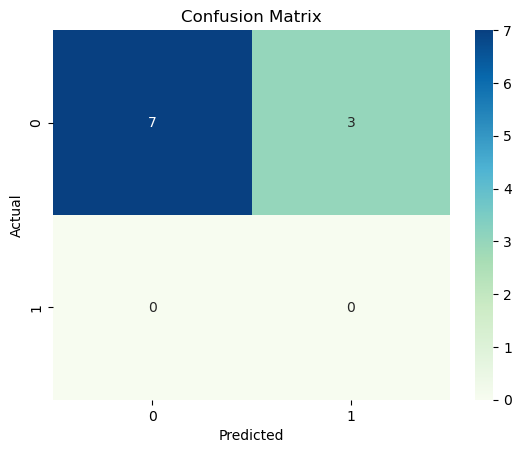

no. of iteration 40 Duration: 0:00:14.529938
40 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


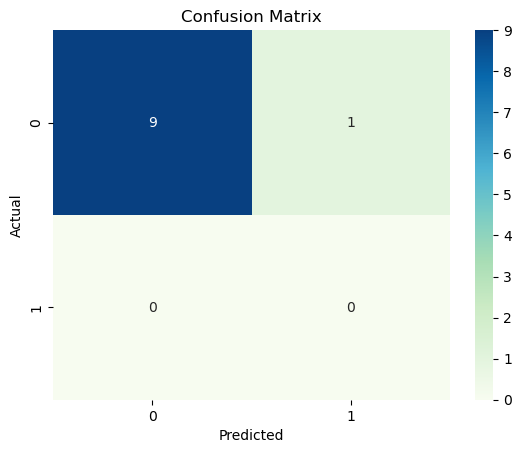

no. of iteration 50 Duration: 0:00:13.524254
50 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


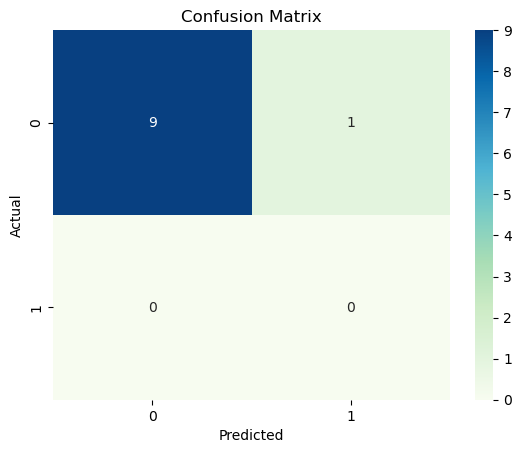

no. of iteration 60 Duration: 0:00:15.020056
60 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


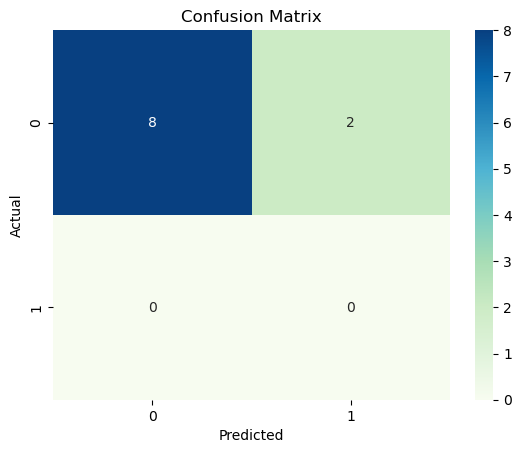

no. of iteration 70 Duration: 0:00:15.522412
70 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[8 2]
 [0 0]]
sensitivity: nan
Specificity: 0.8


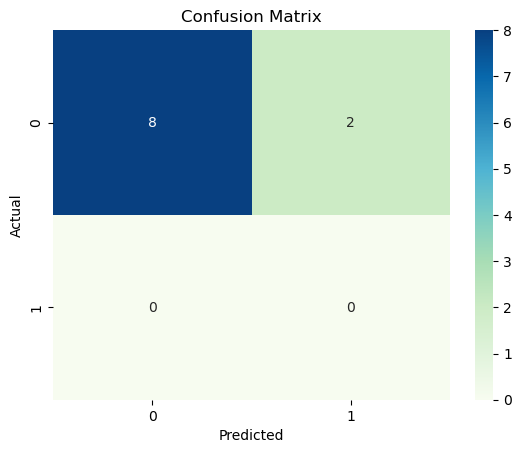

no. of iteration 80 Duration: 0:00:14.627433
80 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[10  0]
 [ 0  0]]
sensitivity: nan
Specificity: 1.0


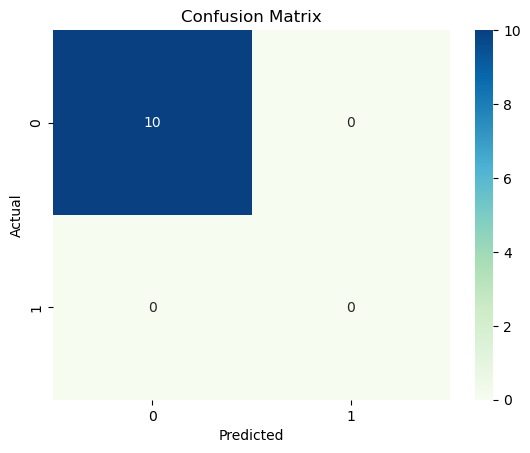

no. of iteration 90 Duration: 0:00:14.516537
90 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[9 1]
 [0 0]]
sensitivity: nan
Specificity: 0.9


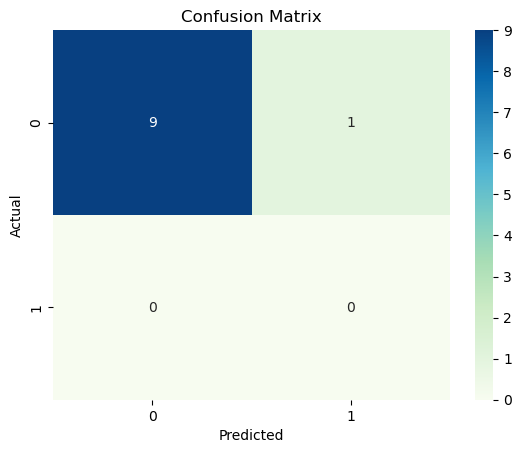

no. of iteration 100 Duration: 0:00:13.250905
100 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


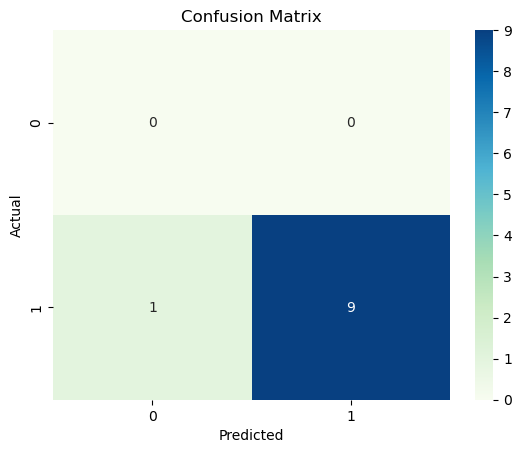

no. of iteration 110 Duration: 0:00:13.572363
110 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [4 6]]
sensitivity: 0.6
Specificity: nan


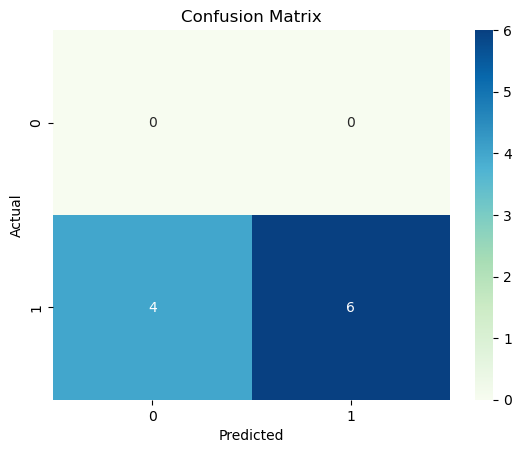

no. of iteration 120 Duration: 0:00:14.735683
120 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


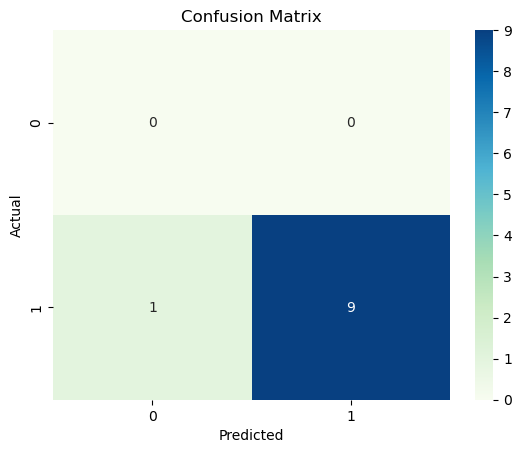

no. of iteration 130 Duration: 0:00:13.981597
130 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


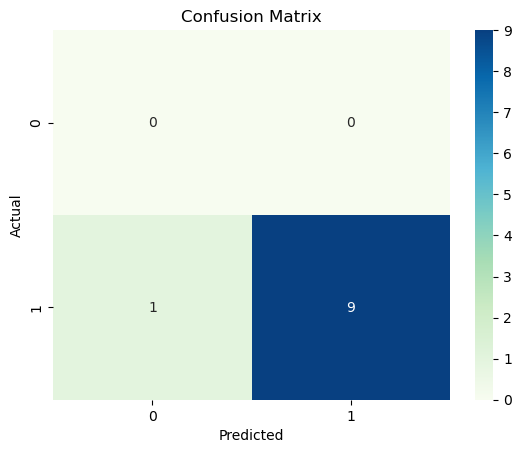

no. of iteration 140 Duration: 0:00:14.030292
140 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [1 9]]
sensitivity: 0.9
Specificity: nan


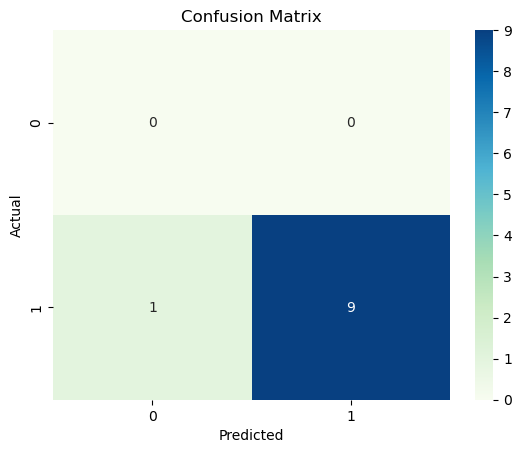

no. of iteration 150 Duration: 0:00:14.035867
150 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [7 3]]
sensitivity: 0.3
Specificity: nan


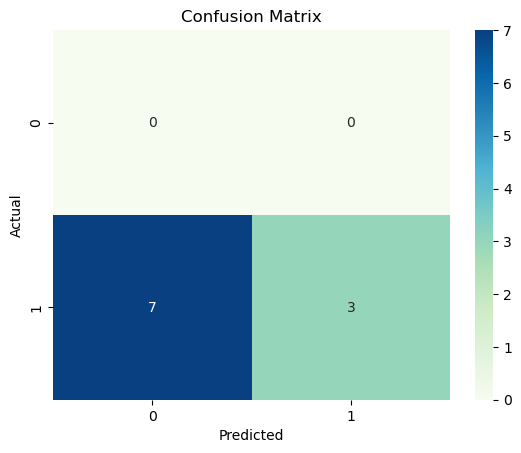

no. of iteration 160 Duration: 0:00:14.080436
160 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [2 8]]
sensitivity: 0.8
Specificity: nan


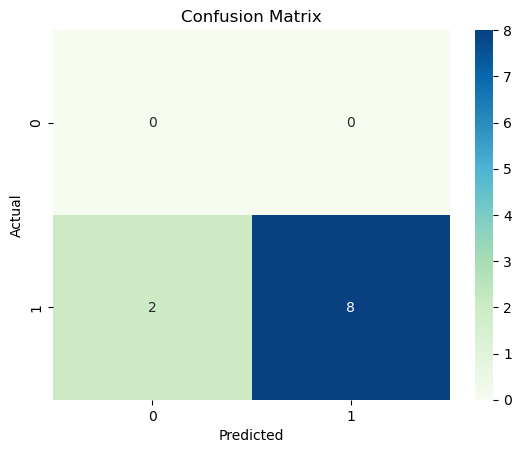

no. of iteration 170 Duration: 0:00:15.291086
170 (10, 432) (10,) (170, 432) (170,)
Confusion Matrix:
[[0 0]
 [3 7]]
sensitivity: 0.7
Specificity: nan


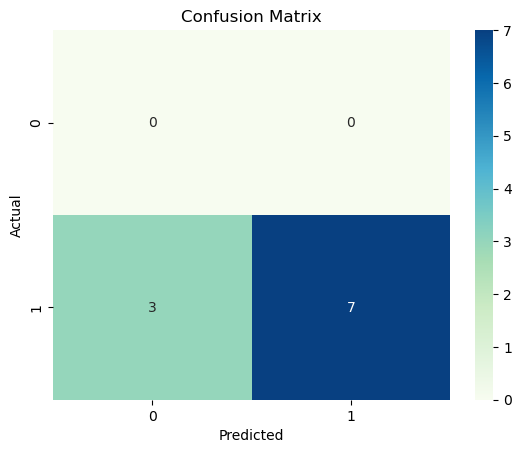

no. of iteration 180 Duration: 0:00:14.101350
mean wrt loocv: [0.7, 0.8, 0.9, 0.7, 0.9, 0.9, 0.8, 0.8, 1.0, 0.9, 0.9, 0.6, 0.9, 0.9, 0.9, 0.3, 0.8, 0.7]
Average svm score for the model for considering 0.8


In [16]:

#Performance metric to be saved
accuracy_scores_for_indpat = 0
score = []
LR_accuracy_score = [] 
LR_sensitivity = []
LR_specificity = []

#This function recieves test dna training data. Feature engineering is applied with lasso and performance metrics are 
#saved as global variables
def run_LR(X_tr,X_te,y_tr,y_te):
        #Global variables
        global accuracy_scores_for_indpat,score,start_time, LR_accuracy_score, LR_sensitivity, LR_specificity 
        start_time = datetime.now()
        #Feature selection: reduce feature with L1 lasso
        sel = SelectFromModel(LogisticRegression(penalty = 'l1', C = 1,
                                         solver = 'liblinear')) # c is inverse of strength of regularisation

        #Fit this to model
        sel.fit(X_train,y_train.values.ravel())
        a = sel.get_support()
        #print(a)
        b = sel.estimator_.coef_ # beauty of regularisation , makes unnecessary features 0
        #print(b)
        #Training and test data reduced with number of features
        X_train_l1 = sel.transform(X_train)
        X_test_l1 = sel.transform(X_test)
        
        #grid_svc.fit(X_train_l1,y_train.values.ravel())
        #Test reduced features with SVM model. Test will the hyper parameters below
        param_grid_lr = [{'penalty' : ['l2'],#, 'elasticnet', 'none','l1',]
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [100, 1000]#,2500, 5000]
               }]
        grid_LR= GridSearchCV(LogisticRegression(),param_grid_lr)
        grid_LR.fit(X_train_l1,y_train.values.ravel())
        y_pred = grid_LR.predict(X_test_l1)
        accuracyscore = accuracy_score(y_test, y_pred)

        #Calculate confusion matrix, accuracy, sensensitivity and specificity. 
        score.append(accuracyscore)
        accuracy_scores_for_indpat = accuracy_scores_for_indpat + (accuracy_score(y_te,y_pred))
        conf_matrix=confusion_matrix(y_te,y_pred,labels=[0,1])
        sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
        specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])

        #Plot confusion matrix
        print("Confusion Matrix:")
        print(conf_matrix)
        print("sensitivity:", sensitivity)
        print("Specificity:", specificity)
        sns.heatmap(conf_matrix,cmap="GnBu",annot=True,
        #cbar_kws={"orientation":"vertical","label":"color bar"},
        xticklabels=[0,1],yticklabels=[0,1])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

        #Save scores in array
        LR_accuracy_score.append(accuracy_score(y_te,y_pred))
        LR_sensitivity.append(sensitivity)
        LR_specificity.append(specificity)

accuracy_score_list = []

#For loop is used to allow for cross validation (leave one out cross validation)
for i in range(0,X.shape[0],10):  
        x_test_forcv = X[i:i+10]
        y_test_forcv = y[i:i+10]
        x_train_forcv = np.concatenate((X[:i],X[i+10:]),axis=0)
        y_train_forcv = np.concatenate((y[:i],y[i+10:]),axis=0)
        #Converting numpy to pandasdataframes
        X_train = pd.DataFrame(x_train_forcv)
        X_test = pd.DataFrame(x_test_forcv)
        y_test = pd.DataFrame(y_test_forcv)
        y_train = pd.DataFrame(y_train_forcv)
       #Pass training data and test data to model and for feature engineering
        run_LR(X_train,X_test,y_train,y_test)
        end_time = datetime.now()
        print('no. of iteration',i+10,'Duration: {}'.format(end_time - start_time))


print('mean wrt loocv:',score)
print('Average svm score for the model for considering',accuracy_scores_for_indpat/18)


#plot for last case only
#mi_score.plot.bar(figsize = (16,7))




In [17]:
#The code below prints the average accuracy, standard deviation of the accuracy, mean sensivity and mean specificity: 
#This is for the LR:

print("Accuracy score Mean:")
print(np.mean(LR_accuracy_score))
print("\n Accuracy score Sd:")
print(np.std(LR_accuracy_score))
print("\n Sensivitity score mean:")
print(np.nanmean(LR_sensitivity))
print("\n Specificity score mean:")
print(np.nanmean(LR_specificity))

Accuracy score Mean:
0.8

 Accuracy score Sd:
0.15634719199411434

 Sensivitity score mean:
0.75

 Specificity score mean:
0.8400000000000001
